Ги вчитуваме потребните библиотеки

In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [680]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [681]:
data = pd.read_csv('/content/drive/MyDrive/ProektVNP/ProektVNP_dataset.csv')

Проверуваме дали имаме null вредности

In [682]:
data.isnull().sum()

Country           0
Year              0
Month             0
Food Item         0
Measurement       0
Average Price     0
Currency          0
dtype: int64

In [683]:
data

,Country,Year,Month,Food Item,Measurement,Average Price,Currency
0,Canada,2018,1,Bread,Loaf,2.82,CAD
1,Canada,2018,2,Bread,Loaf,2.75,CAD
2,Canada,2018,3,Bread,Loaf,2.72,CAD
3,Canada,2018,4,Bread,Loaf,2.73,CAD
4,Canada,2018,5,Bread,Loaf,2.79,CAD
...,...,...,...,...,...,...,...
571,Canada,2021,8,Mushrooms,1 Kg,9.79,CAD
572,Canada,2021,9,Mushrooms,1 Kg,9.68,CAD
573,Canada,2021,10,Mushrooms,1 Kg,9.43,CAD
574,Canada,2021,11,Mushrooms,1 Kg,9.74,CAD


In [684]:
data.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Measurement',
       'Average Price ', 'Currency '],
      dtype='object')

In [685]:
data['Food Item '].nunique()

12

**Имаме 12 производи**

In [686]:
data_plt = data.copy()

Правиме визуелизација на податоците

In [687]:
import matplotlib.pyplot as plt

Колоните за година и месец ги спојуваме во година-месец формат, за подобра визуелизација.

In [688]:
data["Date"] = pd.to_datetime(data["Year "].astype(str) + '/' + data["Month "].astype(str).str.zfill(2)).dt.strftime('%Y-%m')

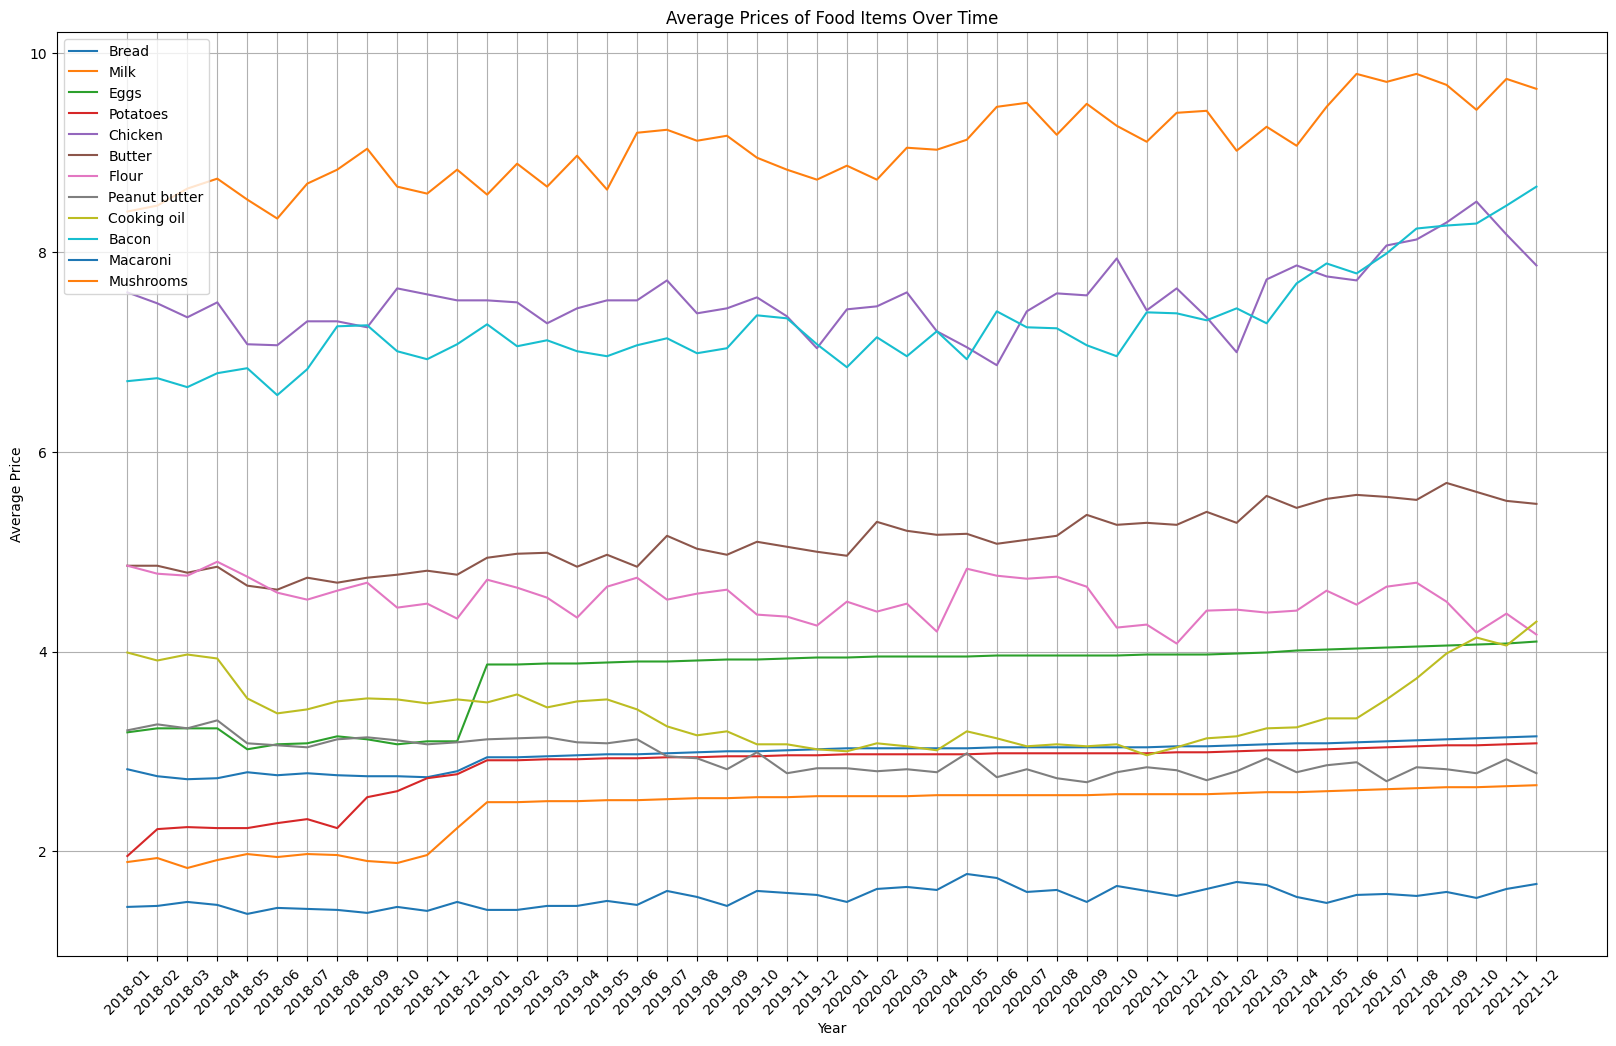

In [689]:
food_items = data['Food Item '].unique()

plt.figure(figsize=(20, 12))

for food_item in food_items:
    food_data = data[data['Food Item '] == food_item]
    plt.plot(food_data['Date'], food_data['Average Price '], label=food_item)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Food Items Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Гледаме дека цените на скоро сите прозводи се зголемени во периодот од 4 години.

##LSTM

In [690]:
data1 = data.copy()

In [691]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [692]:
le = LabelEncoder()

Ги енкодираме вредностите за производите

In [693]:
data1['Food Item '] = le.fit_transform(data1['Food Item '])

In [694]:
data1

,Country,Year,Month,Food Item,Measurement,Average Price,Currency,Date
0,Canada,2018,1,1,Loaf,2.82,CAD,2018-01
1,Canada,2018,2,1,Loaf,2.75,CAD,2018-02
2,Canada,2018,3,1,Loaf,2.72,CAD,2018-03
3,Canada,2018,4,1,Loaf,2.73,CAD,2018-04
4,Canada,2018,5,1,Loaf,2.79,CAD,2018-05
...,...,...,...,...,...,...,...,...
571,Canada,2021,8,9,1 Kg,9.79,CAD,2021-08
572,Canada,2021,9,9,1 Kg,9.68,CAD,2021-09
573,Canada,2021,10,9,1 Kg,9.43,CAD,2021-10
574,Canada,2021,11,9,1 Kg,9.74,CAD,2021-11


Правиме drop на непотребните колони.

In [695]:
data1 = data1.drop('Country ', axis=1)
data1 = data1.drop('Date', axis=1)
data1 = data1.drop('Measurement', axis=1)
data1 = data1.drop('Currency ', axis=1)

In [696]:
data1

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [697]:
data1['Food Item '].unique()

array([ 1,  8,  5, 11,  3,  2,  6, 10,  4,  0,  7,  9])

In [698]:
x = data1.drop('Average Price ', axis=1)
y = data1.iloc[:, -1:]

In [699]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [700]:
scaler = StandardScaler()

In [701]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [702]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [703]:
X_train.shape

(460, 3)

In [704]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [705]:
X_train.shape

(460, 1, 3)

In [706]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [707]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [708]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
23/23 [==============================] - 4s 28ms/step - loss: 24.6952 - mean_absolute_error: 4.3849 - val_loss: 23.0004 - val_mean_absolute_error: 4.3424
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 23.5613 - mean_absolute_error: 4.2523 - val_loss: 21.2906 - val_mean_absolute_error: 4.1433
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 20.8750 - mean_absolute_error: 3.9186 - val_loss: 16.9591 - val_mean_absolute_error: 3.5944
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 14.5657 - mean_absolute_error: 3.0047 - val_loss: 8.1783 - val_mean_absolute_error: 2.1373
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 7.1426 - mean_absolute_error: 1.9899 - val_loss: 4.5294 - val_mean_absolute_error: 1.6602
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 5.9756 - mean_absolute_error: 1.8962 - val_loss: 4.2827 - val_mean_absolute_error: 1.5685
Epoch 7/100
23

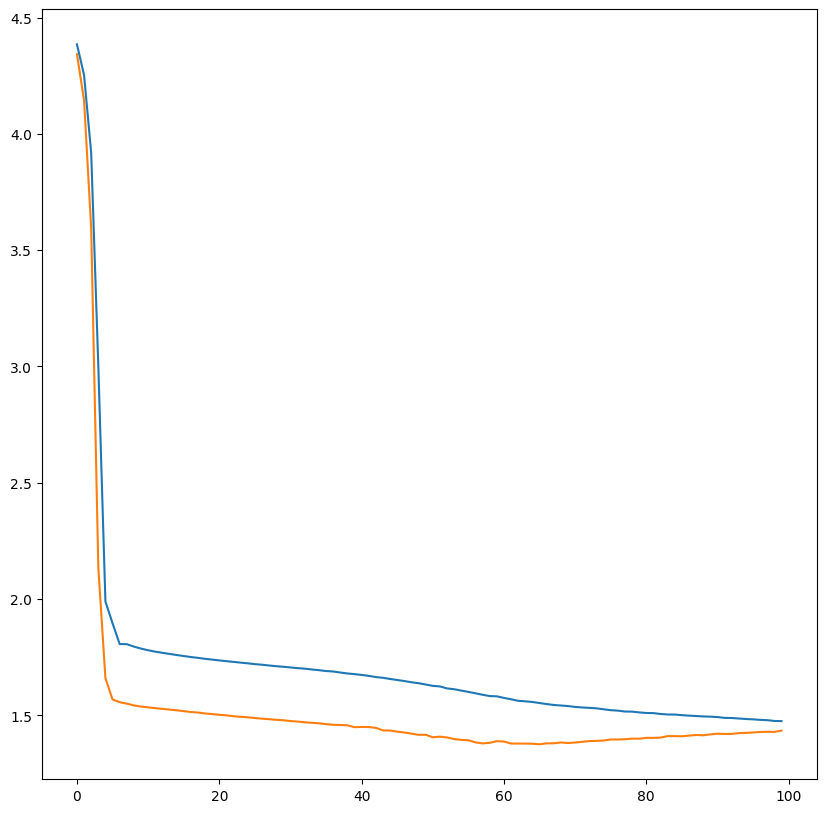

In [709]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [710]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [711]:
from sklearn.metrics import r2_score

r2_score(Y_test,y_pred)

0.26616881356196465

##Linear Regression

In [712]:
data2 = data.copy()

In [713]:
from sklearn.linear_model import LinearRegression

In [714]:
model = LinearRegression()

In [715]:
data2['Food Item '] = le.fit_transform(data2['Food Item '])

In [716]:
data2 = data2.drop('Country ', axis=1)
data2 = data2.drop('Measurement', axis=1)
data2 = data2.drop('Currency ', axis=1)
data2 = data2.drop('Date', axis=1)

In [717]:
data2

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [718]:
x = data2.iloc[:, 0:-1]
y = data2.iloc[:, -1:]

In [719]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [720]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [721]:
model.fit(X_train, Y_train)

LinearRegression()

In [722]:
pred = model.predict(X_test)

In [723]:
r2_score(Y_test,pred)

0.08055428107891505

##CatBoost

In [724]:
data3 = data.copy()

In [725]:
!pip install catboost

In [726]:
from catboost import CatBoostRegressor

In [727]:
data3['Food Item '] = le.fit_transform(data3['Food Item '])

In [728]:
data3 = data3.select_dtypes(exclude='object')

In [729]:
data3

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [730]:
x = data2.iloc[:, 0:-1]
y = data2.iloc[:, -1:]

In [731]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [732]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [733]:
model = CatBoostRegressor()

In [734]:
model.fit(X_train, Y_train)

Learning rate set to 0.036216
0:	learn: 2.2211404	total: 1.18ms	remaining: 1.17s
1:	learn: 2.1690505	total: 1.84ms	remaining: 917ms
2:	learn: 2.1196760	total: 2.36ms	remaining: 783ms
3:	learn: 2.0695445	total: 2.86ms	remaining: 712ms
4:	learn: 2.0555738	total: 3.36ms	remaining: 668ms
5:	learn: 2.0110743	total: 3.79ms	remaining: 628ms
6:	learn: 1.9687853	total: 4.28ms	remaining: 607ms
7:	learn: 1.9603799	total: 4.7ms	remaining: 583ms
8:	learn: 1.9186410	total: 5.17ms	remaining: 569ms
9:	learn: 1.8748530	total: 5.65ms	remaining: 560ms
10:	learn: 1.8251803	total: 6.11ms	remaining: 550ms
11:	learn: 1.7912062	total: 6.6ms	remaining: 544ms
12:	learn: 1.7835683	total: 7ms	remaining: 532ms
13:	learn: 1.7365326	total: 7.64ms	remaining: 538ms
14:	learn: 1.7012361	total: 8.23ms	remaining: 540ms
15:	learn: 1.6572762	total: 8.48ms	remaining: 521ms
16:	learn: 1.6202395	total: 8.74ms	remaining: 505ms
17:	learn: 1.5798075	total: 9.03ms	remaining: 493ms
18:	learn: 1.5453027	total: 10.2ms	remaining: 528

In [737]:
y_pred = model.predict(X_test)

In [738]:
r2_score(Y_test, y_pred)

0.9959201993799274